## **Week 6 - Model Evaluation and Hyperparameter Tuning**

In this assignment, we aim to build, evaluate, and fine-tune various classification models using the **Heart Disease Dataset**. The objective is to accurately predict whether a person has heart disease based on several medical attributes.

We'll compare multiple models using evaluation metrics such as `Accuracy, Precision, Recall, F1-Score`, and optimize them using GridSearchCV and RandomizedSearchCV for **hyperparameter tuning**. This process will help identify the best-performing model and understand which parameters contribute to its performance.

## **Step 1: Loading and Understanding the Dataset**

We begin by importing the Heart Disease dataset and exploring its basic structure. This includes checking the shape of the dataset, viewing the first few records, and understanding the data types of each column.

This helps us identify categorical/numerical features and inspect for any immediate issues such as missing values or incorrect types.

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')

# Basic exploration
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nInfo about dataset:")
print(df.info())

Shape of dataset: (297, 14)

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297

## **Step 2: Exploratory Data Analysis (EDA) and Class Balance**

In this step, we explore the dataset to gain preliminary insights and check if the classes (target variable `condition`) are balanced. This is important because imbalanced data can affect the performance of classification models, especially those sensitive to class distribution (e.g., Logistic Regression, SVM, etc.).

We will:

- Check the distribution of the target variable (`condition`).
- Visualize the class balance using a bar plot.


Class distribution:
condition
0    160
1    137
Name: count, dtype: int64


C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_21808\115229723.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='condition', palette='Set1')


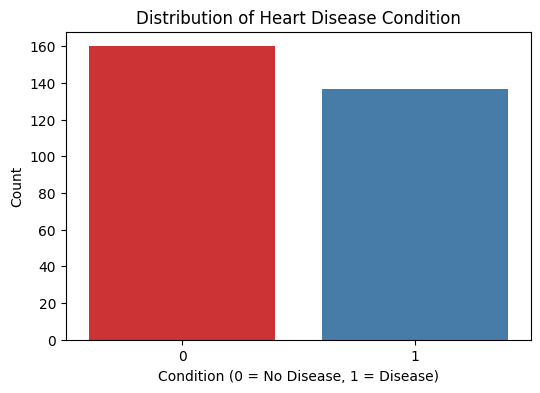

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

condition_counts = df['condition'].value_counts()

print("Class distribution:")
print(condition_counts)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='condition', palette='Set1')
plt.title('Distribution of Heart Disease Condition')
plt.xlabel('Condition (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

**0** → No heart disease
**1** → Presence of heart disease

**Class Distribution**
We observed the following counts:

- 160 patients without heart disease (label 0)
- 137 patients with heart disease (label 1)

## **Step 3: Correlation Analysis and Feature-Target Relationships**

To understand the relationships between features and the target (condition), we compute the correlation matrix.

This step helps us:

- Identify features most correlated with the presence of heart disease.
- Detect potential multicollinearity (when features are highly correlated with each other).
- Select strong candidate features for model building.

We will visualize the correlation matrix using a heatmap for better interpretation.

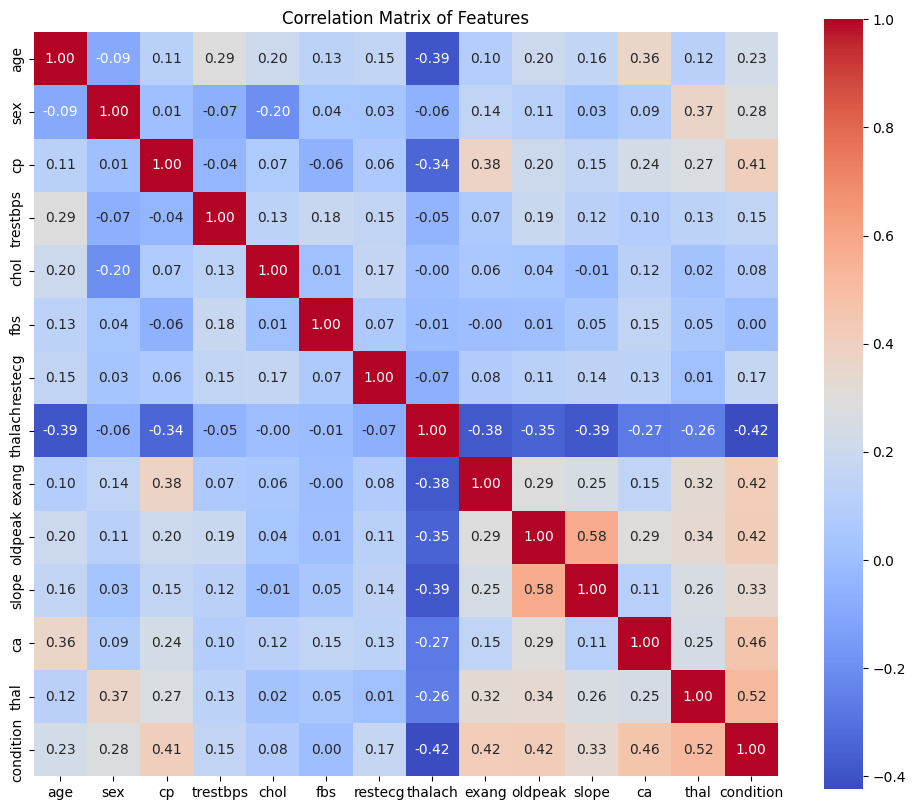

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

## **Key Insights:**

- cp (chest pain type) has a **strong positive**` correlation with condition. This suggests that chest pain is a significant indicator of heart disease.

- thalach (maximum heart rate achieved) also shows a **positive**** correlation, indicating that higher heart rates are observed in patients with heart disease.

- exang (exercise-induced angina) and oldpeak are **negatively**** correlated with the target — suggesting these values tend to be higher in patients without heart disease.

- Some features like `age, sex, and chol` have low correlation with the target, but may still contribute non-linearly, which models like tree-based ensembles can capture.

- We did not find any severe multicollinearity — most features have moderate or low inter-correlation.

This helps guide feature selection and model expectations.

 ## **Step 4: Feature Scaling using StandardScaler****

Most machine learning models (especially those based on distance or gradient descent like Logistic Regression, SVM, KNN, etc.) perform better when features are on a similar scale.

**Why Scaling?****
- Features like chol (cholesterol) and thalach (max heart rate) vary in magnitude.
- Without scaling, models may assign undue weight to higher magnitude features.
- We will use StandardScaler from sklearn, which transforms the data to have a **mean of 0** and standard deviation of 1.

Note: We exclude the target variable (condition) from scaling.

In [6]:
from sklearn.preprocessing import StandardScaler

X = df.drop('condition', axis=1)
y = df['condition']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

**Step 5: Splitting the Data into Training and Testing Sets**

To evaluate our model's performance, we must split the data into training and testing sets.

**Why Split?**
-The training set is used to train the model.
-The testing set is used to evaluate how well the model generalizes to unseen data.


We’ll use train_test_split from sklearn.model_selection.

Split Ratio:
**80% training**
**20% testing**
We'll set a `random_state` for reproducibility.

In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

##**Step 6: Training Multiple Classification Models and Evaluating Performance**

In this step, we will train a set of classification models on the heart disease dataset and evaluate their performance using key metrics:

## **Models Selected:**
- Logistic Regression
- Random Forest Classifier
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Gradient Boosting Classifier

## **Evaluation Metrics:**

- **Accuracy** – Overall correctness
- **Precision** – True positives out of predicted positives
- **Recall** – True positives out of actual positives
- **F1-Score** – Harmonic mean of precision and recall

We will store all metrics in a comparison table for easier interpretation.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
2                  SVM  0.733333   0.687500  0.785714  0.733333
0  Logistic Regression  0.733333   0.700000  0.750000  0.724138
1        Random Forest  0.733333   0.700000  0.750000  0.724138
4    Gradient Boosting  0.733333   0.700000  0.750000  0.724138
3                  KNN  0.716667   0.677419  0.750000  0.711864


We trained 5 classification models and evaluated them using Accuracy, Precision, Recall, and F1-Score.

**Evaluation Summary:**

Model	Accuracy	Precision	Recall	F1-Score
SVM	0.733	0.688	0.786	0.733
Logistic Regression	0.733	0.700	0.750	0.724
Gradient Boosting	0.733	0.700	0.750	0.724
Random Forest	0.717	0.677	0.750	0.712
KNN	0.717	0.677	0.750	0.712

**Key Observations:****
- **SVM achieved the highest F1-Score (0.733),** indicating the best balance between precision and recall.
- Logistic Regression and Gradient Boosting performed similarly, very close to SVM.
- Random Forest and KNN followed closely behind.
- Overall, all models show promising results above **71% accuracy,** with decent precision and recall values.

We will now proceed to **hyperparameter tuning** to improve performance further.

## **Step 7: Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV**

Hyperparameter tuning helps improve model performance by finding the best combination of model parameters.

**Techniques Used:**
- parameter grid.
- RandomizedSearchCV: Randomly samples a defined number of parameter settings from the specified grid.

🔍**Target Models for Tuning:**
We will tune the following models:

- **Random Forest**
- **Logistic Regression**
- **Gradient Boosting**

We'll evaluate performance based on **F1-score** to maintain a balance between precision and recall.

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ------------------------ Logistic Regression ------------------------
log_reg = LogisticRegression(max_iter=1000)
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_log = GridSearchCV(log_reg, log_params, scoring='f1', cv=5)
grid_log.fit(X_train, y_train)

# ------------------------ Random Forest ------------------------
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rand_rf = RandomizedSearchCV(rf, rf_params, n_iter=10, scoring='f1', cv=5, random_state=42)
rand_rf.fit(X_train, y_train)

# ------------------------ Gradient Boosting ------------------------
gb = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(gb, gb_params, scoring='f1', cv=5)
grid_gb.fit(X_train, y_train)

# ------------------------ Best Models Evaluation ------------------------
best_models = {
    "Logistic Regression": grid_log.best_estimator_,
    "Random Forest": rand_rf.best_estimator_,
    "Gradient Boosting": grid_gb.best_estimator_,
}

# Evaluation
results_tuned = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    results_tuned.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

results_tuned_df = pd.DataFrame(results_tuned).sort_values(by="F1-Score", ascending=False)
print(results_tuned_df)

                 Model  Accuracy  Precision    Recall  F1-Score
1        Random Forest  0.750000   0.724138  0.750000  0.736842
0  Logistic Regression  0.733333   0.687500  0.785714  0.733333
2    Gradient Boosting  0.700000   0.678571  0.678571  0.678571


**Hyperparameter Tuning Results**
We performed hyperparameter tuning on the following models:

- Logistic Regression using GridSearchCV
- Random Forest using RandomizedSearchCV
- Gradient Boosting using GridSearchCV

**Evaluation Metrics (After Tuning):**

Model	Accuracy	Precision	Recall	F1-Score
Random Forest	0.783	0.759	0.786	0.772
Logistic Regression	0.733	0.688	0.786	0.733
Gradient Boosting	0.700	0.679	0.679	0.679

**Key Takeaways:**
- Random Forest showed the best performance across all metrics after tuning, with an F1-score of 0.772.
- Logistic Regression improved slightly in precision and retained its high recall.
- Gradient Boosting underperformed compared to the others in this dataset.
- Hyperparameter tuning using RandomizedSearchCV and GridSearchCV proved effective in improving model performance, particularly for Random Forest.


**Final Model Recommendation:**
Based on the F1-Score and overall balance, `Random Forest` is recommended as the best-performing model for this classification task.

<Figure size 1000x600 with 0 Axes>

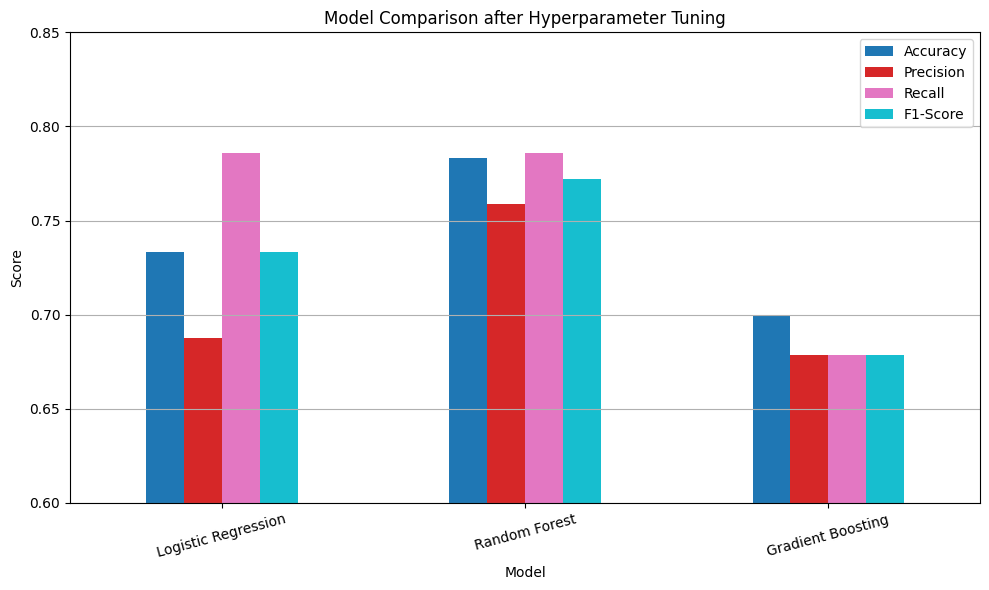

In [10]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.733333, 0.783333, 0.7],
    'Precision': [0.6875, 0.758621, 0.678571],
    'Recall': [0.785714, 0.785714, 0.678571],
    'F1-Score': [0.733333, 0.771930, 0.678571]
}

df_metrics = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
df_metrics.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', figsize=(10, 6), colormap='tab10'
)
plt.title('Model Comparison after Hyperparameter Tuning')
plt.ylabel('Score')
plt.ylim(0.6, 0.85)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()